In [1]:
%cd ../../

/mnt/sda/otani/Experiments/eval-detection


In [27]:
import neptune.new as neptune
import glob
import json
import os
import tempfile
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
run_id = "EV-62"
run = neptune.init(
    project=os.environ["NEPTUNE_PROJECT"], run=run_id,
)

https://app.neptune.ai/mayu-ot/eval-detection/e/EV-62
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


True /tmp/tmpak2kfs3w/performance_vs_det_per_img.pdf


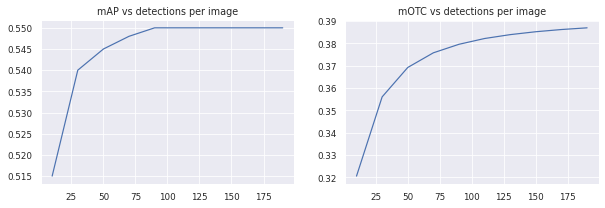

In [39]:
measures = {}
with tempfile.TemporaryDirectory() as tmpdir:
    for m in range(10, 200, 20):
        run[f"measures/max_per_img={m}"].download(tmpdir)
        measures[m] = json.load(
            open(os.path.join(tmpdir, f"max_per_img={m}.json"))
        )

    sns.set("paper")
    x = []
    mAP = []
    otc = []
    for k, v in measures.items():
        x.append(k)
        mAP.append(v["metric"]["bbox_mAP"])
        otc.append(v["metric"]["mOTC"])

    f, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 3))
    axes[0].plot(x, mAP)
    axes[0].set_title("mAP vs detections per image")

    axes[1].plot(x, otc)
    axes[1].set_title("mOTC vs detections per image")

    f_name = os.path.join(tmpdir, "performance_vs_det_per_img.pdf")
    f.savefig(f_name, bbox_inches="tight")
    run["figs/performance_vs_det_per_img"].upload(f_name)